In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv("train.csv")
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


# Checking the type of data in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# Checking for null values

In [8]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

As we see that there are no null values in our dataset, we can now carry on without imputations

In [9]:
df.drop(['id'],axis = 1,inplace=True)

In [10]:
df.describe(include='all')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


# Considering one feature at a time

## Gender

In [17]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Has only two values 'Male' and 'Female'.
Next lets, check the count of each and the ratio of male and female in the data.

Gender


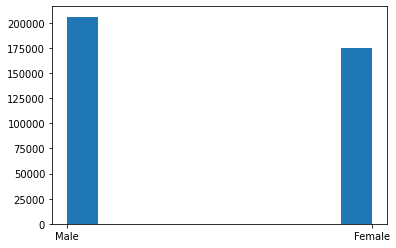

Vehicle_Age


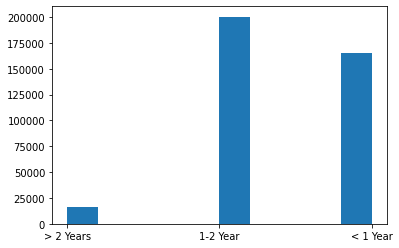

Vehicle_Damage


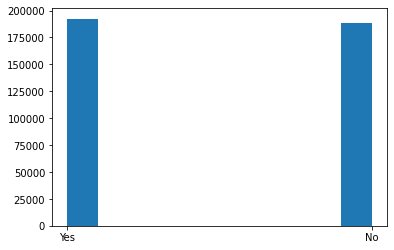

In [22]:
for i in df.columns:
    if df[i].dtype == object:
        print(i)
        plt.hist(df[i])
        plt.show()

Apart from vehicle age all the other categorical datas are almost evenly distributed

In [25]:
print(len(df[df['Vehicle_Age']=='> 2 Years']))

16007


# Checking for correlation of data

In [27]:
y = df['Response']
x = df.drop(['Response'],axis=1)

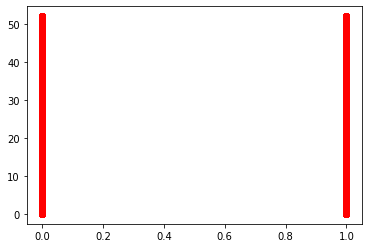

In [36]:
plt.rcParams['agg.path.chunksize'] = 100000
plt.plot(df['Response'],df['Region_Code'],'ro')
plt.show()

## Linear Correlatiom

In [11]:
df.corr(method='spearman')

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.064802,0.012923,-0.268065,0.099440,-0.648227,-0.001618,0.144360
Driving_License,-0.064802,1.000000,0.000533,0.014969,-0.013822,0.045131,-0.000852,0.010155
Region_Code,0.012923,0.000533,1.000000,-0.003932,-0.036529,-0.014842,-0.002883,0.001202
Previously_Insured,-0.268065,0.014969,-0.003932,1.000000,-0.029522,0.208324,0.002537,-0.341170
Annual_Premium,0.099440,-0.013822,-0.036529,-0.029522,1.000000,-0.197696,-0.000143,0.033991
Policy_Sales_Channel,-0.648227,0.045131,-0.014842,0.208324,-0.197696,1.000000,0.000195,-0.137229
Vintage,-0.001618,-0.000852,-0.002883,0.002537,-0.000143,0.000195,1.000000,-0.001051
Response,0.144360,0.010155,0.001202,-0.341170,0.033991,-0.137229,-0.001051,1.000000


## Scatter plot

In [ ]:
fig,axes = plt.subplot(nrows = len(df), ncols = 1)
for i in df.columns:
    axes[j][0].scatter()

# Label Encoding

In [65]:

df1 = df.copy()
lab = LabelEncoder()
for i in df.columns:
    if df[i].dtype == object:
        df1[i] = lab.fit_transform(df[i]).astype('float64')
df1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1.0,44,1,28.0,0,2.0,1.0,40454.0,26.0,217,1
1,1.0,76,1,3.0,0,0.0,0.0,33536.0,26.0,183,0
2,1.0,47,1,28.0,0,2.0,1.0,38294.0,26.0,27,1
3,1.0,21,1,11.0,1,1.0,0.0,28619.0,152.0,203,0
4,0.0,29,1,41.0,1,1.0,0.0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1.0,74,1,26.0,1,0.0,0.0,30170.0,26.0,88,0
381105,1.0,30,1,37.0,1,1.0,0.0,40016.0,152.0,131,0
381106,1.0,21,1,30.0,1,1.0,0.0,35118.0,160.0,161,0
381107,0.0,68,1,14.0,0,2.0,1.0,44617.0,124.0,74,0


# One Hot Encoding

In [63]:
df1 = df.copy()
for i in df1.columns:
    if df1[i].dtype == object:
        d = pd.get_dummies(df[i],prefix = i)
        df1.drop(i,axis=1,inplace=True)
        df1 = df1.join(d)
df1

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,0,1,0,0,1,0,1
1,76,1,3.0,0,33536.0,26.0,183,0,0,1,1,0,0,1,0
2,47,1,28.0,0,38294.0,26.0,27,1,0,1,0,0,1,0,1
3,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,1,0,1,0
4,29,1,41.0,1,27496.0,152.0,39,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,30170.0,26.0,88,0,0,1,1,0,0,1,0
381105,30,1,37.0,1,40016.0,152.0,131,0,0,1,0,1,0,1,0
381106,21,1,30.0,1,35118.0,160.0,161,0,0,1,0,1,0,1,0
381107,68,1,14.0,0,44617.0,124.0,74,0,1,0,0,0,1,0,1
